<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Web Scraping

_Author: Dave Yerrington (SF)_

---

## Learning Objectives
- Revisit how to locate elements on a webpage
- Aquire unstructure data from the internet using Beautiful soup.
- Discuss limitations associated with simple requests and urllib libraries
- Introduce Selenium as a solution, and implement a scraper using selenium

## Lesson Guide

- [Introduction](#intro)
- [Building a web scraper](#building-scraper)
- [Retrieving data from the HTML page](#retrieving-data)
    - [Retrieving the restaurant names](#retrieving-names)
    - [Challenge: Retrieving the restaurant locations](#retrieving-locations)
    - [Retrieving the restaurant prices](#retrieving-prices)


- [Summary](#summary)

<a id="intro"></a>
## Introduction

In this codealong lesson, we'll build a web scraper using requests and BeautifulSoup. We will also explore how to use a headless browser called Selenium.

We'll begin by scraping OpenTable's DC listings. We're interested in knowing the restaurant's **name, location, price, and how many people booked it today.**

OpenTable provides all of this information on this given page: http://www.opentable.com/washington-dc-restaurant-listings

Let's inspect the elements of this page to assure we can find each of the bits of information in which we're interested.

---

<a id="building-scraper"></a>
## Building a web scraper

Now, let's build a web scraper for OpenTable using urllib and Beautiful Soup:

In [1]:
# import our necessary first packages
from bs4 import BeautifulSoup
import requests

In [2]:
# set the url we want to visit
url = "http://www.opentable.com/washington-dc-restaurant-listings"

# visit that url, and grab the html of said page
html = requests.get(url)

At this point, what is in html?

In [3]:
# .text returns the request content in Unicode
html.text[:500]

'           <!DOCTYPE html><html lang="en"><head><meta charset="utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=9; IE=8; IE=7; IE=EDGE"/> <title>Restaurant Reservation Availability</title>    <meta  name="robots" content="noindex,nofollow" > </meta>     <link rel="shortcut icon" href="//components.otstatic.com/components/favicon/1.0.6/favicon/favicon.ico" type="image/x-icon"/><link rel="icon" href="//components.otstatic.com/components/favicon/1.0.6/favicon/favicon-16.png" sizes="16x16"/><l'

We will need to convert this html objct into a soup object so we can parse it using python and BS4

In [4]:
# convert this into a soup object
soup = BeautifulSoup(html.text, 'html.parser')

In [8]:
soup.find_all('script')

[<script>window.oc=window.oc||{};oc.renderedComponents=oc.renderedComponents||{};oc.renderedComponents["favicon"]="1.0.6";</script>,
 <script>
       window.OTDataLayer = [{"domain":1,"language":"en-US","metro_id":201,"page_name":"multisearchresultpage","user_type":"anonymous","visitor_status":"Logged Out"}];
     </script>,
 <script>window.OT = window.OT || {};
 window.OT.SRS = {
   abTestingAnalytics: {"account":"2d65a94551a4a1caddd5a825a88698a89e19f2d5","hostname":"ac.opentable.com"},
   disableRaven: false,
   domainId: 1,
   jsHeadVersion: "1.0.91",
   lang: "en",
   ocUrl: window.location.protocol + '//oc-registry.opentable.com/v2/',
   requestId: "4d961d70-b040-4d0b-9838-82acc0d0a828"
 };
 
 window.OT.searchAutoComplete = {};
 window.OT.searchAutoComplete.ticketedRids = [681,1537,3334,7055,11065,29995,47119,53716,89905,100033,112846,114886,118765,140968,160504,185560,185773,210868,211918,212878,233239,252232,263128,267508,268867,270751,335149,347206,349942,984418,986635,986725];

In [10]:
interesting_spans = soup.find_all('span', class_='rest-row-name-text')
for s in interesting_spans:
    print(s.text)

Stream
Ali O'Conner
Jayda Bahringer
Consequatur
1034 Jacobi
Modi
Parker
Key
Elwyn Stream
Animi Maggio
Wilson Dicki
Murphy
In Wolff
Meadow
Quam Ferry
Doloribus Mountains
Court
Berta Meadows
Road
Tyrees
Inventore
Audie Walks
Springs
Claudes
Forges
Morar
Alfreda Witting
Litzys
453 Simonis
Numquam
Eius
Nolan
Maximillian Alley
Veronicas
Darricks
Rem Wall
Consectetur Bode
Consectetur
Earum Throughway
Daishas
Manor
Tatyana Hickle
608 Krajcik
Est
Common
Rem
Sint Langworth
Maviss
Magni
Tenetur Botsford
795 Conroy
Voluptas Cliff
Shoals
McDermott Spurs
Explicabo Lock
Nihil Walk
630 Hessel
1140 Yundt
Zions
Trail
Amirs
1029 Beier
Feil
Trail
Fork
Enim Spencer
358 Abernathy
Karlis
Brakus Loop
Quisquam Mews
1164 Streich
1272 Parker
Et
Katlyns
1414 West
Knolls
Sit Doyle
Rerum Raynor
Lodge
Kautzer
1056 Roberts
Delmers
Ebba Hermiston
Eum Court
460 Veum
Kellie Abernathy
13 Cartwright
Unde Meadows
Inlet
1137 Lehner
Gulgowski
421 Kris
Sunt Haag
Breitenberg
Turnpike
Agloe Bar & Grill
Sequi Alley
Grants
Kub
J

In [13]:
ali = interesting_spans[1]

In [22]:
ali.parent.parent.parent.next_sibling.next_sibling.next_sibling.find('i').text

'  $    $      '

In [28]:
restaurants = []
for span in interesting_spans:
    name = span.text
    pricing = span.parent.parent.parent.next_sibling.next_sibling.next_sibling.find('i').text
    restaurants.append({'name': name, 'pricing': pricing})
import pandas as pd
restaurants_df = pd.DataFrame.from_records(restaurants)
restaurants_df['pricing_no_spaces'] = restaurants_df.pricing.str.replace(' ', '')
restaurants_df['how_expensive'] = restaurants_df.pricing_no_spaces.map(len)
restaurants_df

,name,pricing,pricing_no_spaces,how_expensive
0,Stream,$ $,$$,2
1,Ali O'Conner,$ $,$$,2
2,Jayda Bahringer,$ $ $,$$$,3
3,Consequatur,$ $ $,$$$,3
4,1034 Jacobi,$ $ $ $,$$$$,4
5,Modi,$ $,$$,2
6,Parker,$ $,$$,2
7,Key,$ $ $,$$$,3
8,Elwyn Stream,$ $,$$,2
9,Animi Maggio,$ $,$$,2


<a id="retrieving-data"></a>
### Retrieving data from the HTML page

Let's first find each restaurant name listed on the page we've loaded. How do we find the page location of the restaurant? (Hint: We need to know where in the **HTML** the restaurant element is housed.) In order to find the HTML that renders the restaurant location, we can use Google Chrome's Inspect tool:

> http://www.opentable.com/washington-dc-restaurant-listings

> 1. Visit the URL above. 

> 2. Right-click on an element you are interested in, then choose Inspect (in Chrome). 

> 3. This will open the Developer Tools and show the HTML used to render the selected page element. 

> Throughout this lesson, we will use this method to find tags associated with elements of the page we want to scrape.

See if you can find the restaurant name on the page. Keep in mind there are many restaurants loaded on the page.

In [ ]:
# print the restaurant names
soup.find_all(name='span', attrs={'class':'rest-row-name-text'})

It is important to always keep in mind the data types that were returned. Note this is a `list`, and we know that immediately by observing the outer square brackets and commas separating each tag.

Next, note the elements of the list are `Tag` objects, not strings. (If they were strings, they would be surrounded by quotes.) The Beautiful Soup authors chose to display a `Tag` object visually as a text representation of the tag and its contents. However, being an object, it has many methods that we can call on it. For example, next we will use the `encode_contents()` method to return the tag's contents encoded as a Python string.

<a id="retrieving-names"></a>
#### Retrieving the restaurant names

Now that we found a list of tags containing the restaurant names, let's think how we can loop through them all one-by-one. In the following cell, we'll print out the name (and **only** the clean name, not the rest of the html) of each restaurant.

In [ ]:
# for each element you find, print out the restaurant name
for entry in soup.find_all(name='span', attrs={'class':'rest-row-name-text'}):
    print(entry.text)

Great!

<a id="retrieving-locations"></a>
#### Challenge: Retrieving the restaurant locations

Can you repeat that process for finding the location? For example, barmini by Jose Andres is in the location listed as "Penn Quarter" in our search results.

In [ ]:
# first, see if you can identify the location for all elements -- print it out

In [ ]:
# now print out EACH location for the restaurants

<a id="retrieving-prices"></a>
#### Retrieving the restaurant prices

Ok, we've figured out the restaurant name and location. Now we need to grab the price (number of dollar signs on a scale of one to four) for each restaurant. We'll follow the same process.

In [ ]:
# print out all prices
soup.find_all('div', {'class':'rest-row-pricing'})

In [ ]:
# print out EACH number of dollar signs per restaurant
# this one is trickier to eliminate the html. Hint: try a nested find
for entry in soup.find_all('div', {'class':'rest-row-pricing'}):
    print(entry.find('i').text)

That looks great, but what if I wanted just the number of dollar signs per restaurant? Can you figure out a way to simply print out the number of dollar signs per restaurant listed?

In [ ]:
# print the number of dollars signs per restaurant

That's weird -- an empty set. Did we find the wrong element? What's going on here? Discuss.

How can we debug this? Any ideas?

## Manas' example

- Let's find out about the candidates at the last Indian election 

http://myneta.info/LokSabha2019/

In [29]:
r = requests.get('http://myneta.info/LokSabha2019/')
r.status_code

200

In [30]:
r.text

'\t\t\t<html>\n\t\t\t\t<head>\n\t\t\t\t   <title>List of constituencies (State Wise) : Lok Sabha 2019 Election Candidate Information</title>\n\t\t\t\t   <meta name="description" content="It provides criminal and financial background information on candidates, MPs and MLAs contesting in elections.It also has information on income and expenditure of political parties.">\n                                <META HTTP-EQUIV="Content-Type" CONTENT="text/html; charset=UTF-8">\n    \t\t\t\t<meta http-equiv="x-ua-compatible" content="ie=edge"/>\n    \t\t\t\t<meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1"/>\n    \t\t\t\t<meta name="author" content="ADR"/>\n                                <link rel="shortcut icon" type="image/x-icon" href="../favicon.ico">\n    \t\t\t\t<link rel="stylesheet" href="/lib/css/text.css"/>\n    \t\t\t\t<link rel="stylesheet" href="/lib/css/main.css"/>\n                                <script type="text/javascript" sr

In [31]:
india_soup = BeautifulSoup(r.text)

In [45]:
import tqdm
all_my_data = []
for hyperlink in tqdm.tqdm(india_soup.find_all('a')[:35]):
    try:
        if 'show_candidates' in hyperlink['href']:
            url = hyperlink['href']
            if url.startswith('index.php'):
                url = 'http://myneta.info/LokSabha2019/' + url
            tables = pd.read_html(url)
            candidates_table = tables[2]
            candidates_table['Constituency'] = hyperlink.string
            all_my_data.append(candidates_table)
    except KeyError:
        pass
        #print("****", hyperlink)
answers = pd.concat(all_my_data)

100%|██████████| 35/35 [00:56<00:00,  7.82s/it]


In [46]:
answers

,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Constituency
0,Kuldeep Rai Sharma&nbsp&nbsp Winner,INC,0,Graduate Professional,52,"Rs 13,22,33,012 ~ 13 Crore+","Rs 8,04,50,870 ~ 8 Crore+",ANDAMAN AND NICOBAR ISLANDS
1,Ayan Mandal,AITC,0,Graduate,30,"Rs 72,70,440 ~ 72 Lacs+","Rs 15,00,000 ~ 15 Lacs+",ANDAMAN AND NICOBAR ISLANDS
2,C G Saji Kumar,All India Hindustan Congress Party,0,12th Pass,48,"Rs 1,20,000 ~ 1 Lacs+",Rs 0 ~,ANDAMAN AND NICOBAR ISLANDS
3,C U Rasheed,IND,0,12th Pass,34,"Rs 2,02,808 ~ 2 Lacs+","Rs 17,00,000 ~ 17 Lacs+",ANDAMAN AND NICOBAR ISLANDS
4,Gour Chandra Majumder,IND,0,Graduate,52,"Rs 60,62,000 ~ 60 Lacs+",Rs 0 ~,ANDAMAN AND NICOBAR ISLANDS
5,Henry,IND,0,10th Pass,50,"Rs 56,459 ~ 56 Thou+",Rs 0 ~,ANDAMAN AND NICOBAR ISLANDS
6,K Kalimuthu,IND,0,8th Pass,66,"Rs 58,50,000 ~ 58 Lacs+",Rs 0 ~,ANDAMAN AND NICOBAR ISLANDS
7,K Venkat Ram Babu,IND,0,10th Pass,45,"Rs 3,52,000 ~ 3 Lacs+",Rs 0 ~,ANDAMAN AND NICOBAR ISLANDS
8,Minati Biswas,IND,0,8th Pass,51,"Rs 31,98,500 ~ 31 Lacs+","Rs 4,00,000 ~ 4 Lacs+",ANDAMAN AND NICOBAR ISLANDS
9,Paritosh Kumar Haldar,IND,0,Post Graduate,61,"Rs 1,99,16,000 ~ 1 Crore+","Rs 13,11,000 ~ 13 Lacs+",ANDAMAN AND NICOBAR ISLANDS


In [49]:
%matplotlib inline

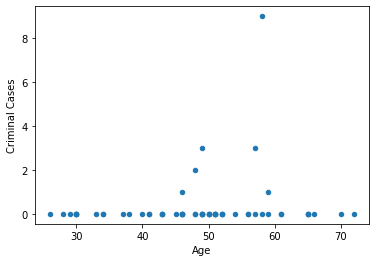

In [52]:
answers.plot.scatter('Age', 'Criminal Cases')

In [40]:
tables = pd.read_html('http://myneta.info/LokSabha2019/index.php?action=show_candidates&constituency_id=686')
tables

[                            HIGHLIGHTS OF CANDIDATES
 0        Total number of constituencies analyzed=543
 1            Total candidates analyzed by NEW = 7954
 2  Candidates with declared criminal cases = 1506...
 3  Candidates with declared serious criminal case...
 4                  Crorepati candidates = 2303 (29%)
 5  Candidates who are graduate or above = 3825 (48%)
 6   Candidates who have not declared PAN = 779 (10%)
 7                  Total women candidates = 720 (9%),
                                HIGHLIGHTS OF WINNERS
 0                Total winners analyzed by NEW = 542
 1   Winners with declared criminal cases = 236 (44%)
 2  Winners with declared serious criminal cases =...
 3                      Crorepati winners = 479 (88%)
 4      Winners who are graduate or above = 394 (73%)
 5         Winners who have not declared PAN = 4 (1%)
 6                     Total women winners = 78 (14%),
                                  Candidate  \
 0    Nitin Jairam Gadkari&nbsp&n

In [41]:
tables[0]

,HIGHLIGHTS OF CANDIDATES
0,Total number of constituencies analyzed=543
1,Total candidates analyzed by NEW = 7954
2,Candidates with declared criminal cases = 1506...
3,Candidates with declared serious criminal case...
4,Crorepati candidates = 2303 (29%)
5,Candidates who are graduate or above = 3825 (48%)
6,Candidates who have not declared PAN = 779 (10%)
7,Total women candidates = 720 (9%)


In [43]:
tables[2]

,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Liabilities
0,Nitin Jairam Gadkari&nbsp&nbsp Winner,BJP,4,Graduate Professional,62,"Rs 18,79,16,075 ~ 18 Crore+","Rs 4,07,29,055 ~ 4 Crore+"
1,Adv. Ulhas Shalikaram Dupare,IND,0,Graduate Professional,53,"Rs 1,46,000 ~ 1 Lacs+",Rs 0 ~
2,Adv. Vijaya Dilip Bagde,Ambedkarite Party of India,0,Graduate Professional,43,"Rs 2,18,000 ~ 2 Lacs+",Rs 0 ~
3,Ali Ashfaque Ahmed,Bahujan Mukti Party,0,Graduate Professional,48,"Rs 14,75,000 ~ 14 Lacs+","Rs 9,00,000 ~ 9 Lacs+"
4,Asim Ali,Minorities Democratic Party,1,10th Pass,28,"Rs 1,62,000 ~ 1 Lacs+","Rs 2,000 ~ 2 Thou+"
5,Comrade Yogesh Krishnarao Thakare,CPI(ML) Red Star,0,12th Pass,43,"Rs 35,06,000 ~ 35 Lacs+",Rs 0 ~
6,Dikshita Anand Tembhurne,Desh Janhit Party,0,Graduate,32,"Rs 98,884 ~ 98 Thou+",Rs 0 ~
7,Dipak Laxmanrao Maske,IND,0,12th Pass,43,"Rs 45,59,259 ~ 45 Lacs+","Rs 16,191 ~ 16 Thou+"
8,Dr. Manisha Bangar,Peoples Party of India (Democratic),0,Graduate Professional,49,"Rs 1,49,51,925 ~ 1 Crore+","Rs 19,06,973 ~ 19 Lacs+"
9,Dr. Vinod Kashiram Badole,Akhil Bhartiya Sarvadharma Samaj Party,0,Post Graduate,63,"Rs 1,51,887 ~ 1 Lacs+","Rs 3,50,000 ~ 3 Lacs+"


In [33]:
india_soup.find_all?

### Summary

In this lesson, we used the Beautiful Soup library to locate elements on a website then scrape their text.